In [1]:
import pandas as pd
import logging
import glob
from sklearn.model_selection import train_test_split
import operator
import nltk
import pickle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_colwidth', 500)
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

In [4]:
traindf, testdf = train_test_split(pd.read_csv('data/github_issues.csv').sample(n=2000000),
                                  test_size = .10)

In [5]:
print('Train {0} rows {1} columns'.format(traindf.shape[0], traindf.shape[1]))
print('Test {0} rows {1} columns'.format(testdf.shape[0], testdf.shape[1]))

Train 1800000 rows 3 columns
Test 200000 rows 3 columns


In [6]:
traindf.head(3)

,issue_url,issue_title,body
1371411,"""https://github.com/apache-spark-on-k8s/spark/issues/100""",run tests against any specified k8s cluster,we currently run integration tests only against a minikube cluster that the integration tests specify. i'd propose we split that out so integration tests can be run against any specified k8s cluster likely via kubectl config without assuming minikube. we can still keep the code that launches the minikube cluster though and provide docs for the two-step process: 1 start minikube 2 run tests against it. this also allows us to more easily run against various cloud providers container environmen...
2359118,"""https://github.com/SebastianM/angular2-google-maps/issues/929""",marker smoothing in markers movement,issue description steps to reproduce and a minimal demo of the problem _use https://plnkr.co or similar -- try this template as a starting point: http://plnkr.co/edit/yx7w20?p=preview _what steps should we try in your demo to see the problem?_ current behavior expected/desired behavior angular2 & angular-google-maps version other information
1031747,"""https://github.com/emberjs/ember.js/issues/15693""",model state transition from root.updated.invalid to a clean state doesn't work,"after updating an invalid record manually to a clean state, the state of the model is set as root.updated.uncommited instead of root.loaded.saved which will make hasdirtyattributes return true even if the record is not dirty. 1. i got a saved record with the attribute 'name'. the state is root.loaded.saved . 2. i change the attribute 'name' and call save on the record beforehand i ensured that the server would respond with an validation error on the attribute 'name' . after ember got the ser..."


In [7]:
train_body_raw = traindf.body.tolist()
train_title_raw = traindf.issue_title.tolist()

In [8]:
train_body_raw[0]

"we currently run integration tests only against a minikube cluster that the integration tests specify. i'd propose we split that out so integration tests can be run against any specified k8s cluster likely via kubectl config without assuming minikube. we can still keep the code that launches the minikube cluster though and provide docs for the two-step process: 1 start minikube 2 run tests against it. this also allows us to more easily run against various cloud providers container environments. possibly in the future we could even run integration tests against n cloud providers using donated compute time from those providers. i think apache spark has some tests that run in amazon aws on donated time rumor ."

In [9]:
train_body_raw[1]

'issue description steps to reproduce and a minimal demo of the problem _use https://plnkr.co or similar -- try this template as a starting point: http://plnkr.co/edit/yx7w20?p=preview _what steps should we try in your demo to see the problem?_ current behavior expected/desired behavior angular2 & angular-google-maps version other information'

# Pre-Process Data For Deep Learning

In [10]:
word_count = {}

In [11]:
for doc in train_body_raw:
    words = nltk.word_tokenize(doc)
    
    for w in words:
        if w not in word_count.keys():
            word_count[w] = 1
        else:
            word_count[w] += 1

In [12]:
len(word_count.keys())

4825504

In [13]:
list(word_count.keys())[10000:10010]

['windowtest',
 '//github.com/omegat-org/omegat-website/blob/04f346b07cd4e06d024b3f16929c5cc72a1b9719/_i18n/en/index.html',
 './rpc/stack/stack.go',
 'influxql.parseduration',
 'transmissio',
 '//user-images.githubusercontent.com/5942/33070171-37c9d132-cf0b-11e7-883b-b5481b895a9b.png',
 'working-as-intended',
 '//github.com/ttux/godotisocustompathfinder3',
 'pairsrecord',
 '//devtopia.esri.com/apps/explorer-test-catalog/issues']

In [14]:
word_count

{'hannahgerstaecker': 1,
 'bitmapfactory.java': 2,
 '//wx.xiaomiquan.com/mweb/views/topicdetail/topicdetail.html': 1,
 'i_error': 2,
 'bitbucket.org/testprivatepod/testprivatepod.git': 1,
 'llaunched': 1,
 "'formelement": 1,
 'macmason': 1,
 '//github.com/inkmap/webdoccanvas/tree/master/vendor/revealjs/plugin': 1,
 'go:0022857': 1,
 'hiába': 3,
 'visą': 1,
 'pkg/newss/test/groups.grp': 1,
 'output_url=null': 1,
 '/home/dinosaur/repos/enspiral-root-systems/cobuy/node_modules/subcommand/index.js:63:19': 1,
 'finishonkey': 4,
 '\\users\\arthur\\desktop\\ps2-scrims-script\\ps2ws.js:5:17': 1,
 'wso2iot': 3,
 '/^case': 1,
 'joshuacroff': 2,
 'astropy/astropy': 8,
 'releasability': 4,
 '要承认奇迹。': 1,
 '/views/shared/_pager.cshtml': 1,
 'child_threads': 1,
 '_performance_schema.replication_applier_status_': 1,
 'list\\_t\\_customertype': 2,
 'improve-color-contrast-in-node-tree': 1,
 'context.playerref': 1,
 'mariasql': 2,
 'android.text.spannablestringbuilder.checkrange': 5,
 'active-menu-item'

In [15]:
sorted_word = sorted(word_count.items(), key=operator.itemgetter(1))

In [16]:
sorted_word[-8001:-1]

[('toys', 614),
 ('cran', 614),
 ('dell', 614),
 ('displayname', 614),
 ('translating', 614),
 ('fastlane', 614),
 ('typos', 614),
 ('submodules', 614),
 ('/dependency', 614),
 ('sqlite3', 615),
 ('которые', 615),
 ('corners', 615),
 ('gaps', 615),
 ('momento', 615),
 ('followup', 615),
 ('reps', 615),
 ('0px', 615),
 ('max-width', 616),
 ('.unwrap', 616),
 ('5.0.2', 616),
 ('erreur', 616),
 ('importantly', 617),
 ('zoomed', 617),
 ('packs', 617),
 ('enumeration', 617),
 ('lobby', 617),
 ('validators', 618),
 ('ol', 618),
 ('freecodecamp', 618),
 ('vista', 618),
 ('nickname', 618),
 ('seja', 619),
 ('spyware', 619),
 ('centre', 619),
 ('packagereference', 619),
 ('alphabetically', 619),
 ('uint32_t', 619),
 ('soap', 619),
 ('//bugzilla.mozilla.org/show_bug.cgi', 619),
 ('happily', 619),
 ('5.x', 619),
 ('pseudo', 619),
 ('ra', 620),
 ('setups', 620),
 ('arm64', 620),
 ('donc', 620),
 ('fix/reason', 620),
 ('undocumented', 620),
 ('floats', 621),
 ('polygons', 621),
 ('2.8', 621),
 ('pr

In [17]:
word_to_index = dict([[w[0], i + 2] for i, w in enumerate(sorted_word[-8001:-1])])
index_to_word = dict([[i + 2, w[0]] for i, w in enumerate(sorted_word[-8001:-1])])

In [18]:
word_to_index['return']

7845

In [20]:
index_to_word[7845]

'return'

In [21]:
word_to_index['pad'] = 0
word_to_index['<unk>'] = 1

In [22]:
index_to_word[0] = 'pad'
index_to_word[1] = '<unk>'

In [23]:
index_to_word[1], index_to_word[0]

('<unk>', 'pad')

In [24]:
word_to_index['pad'], word_to_index['<unk>']

(0, 1)

In [68]:
f = open("weights/word_to_index.pkl","wb")
pickle.dump(word_to_index, f)
f.close()

In [69]:
f = open("weights/index_to_word.pkl","wb")
pickle.dump(index_to_word, f)
f.close()

In [7]:
pickle_in = open("weights/word_to_index.pkl", "rb")
word_to_index = pickle.load(pickle_in)

In [6]:
pickle_in = open("weights/index_to_word.pkl", "rb")
index_to_word = pickle.load(pickle_in)

Text(0,0.5,'Body Count')

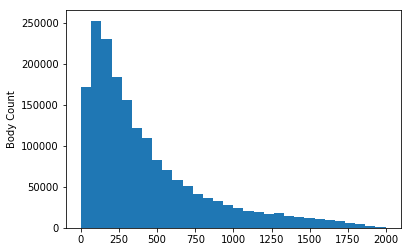

In [25]:
tmp = [len(v) for v in train_body_raw]
plt.hist(tmp, bins = 30)
plt.ylabel('Body Count')

In [26]:
train_body_vecs = []

for doc in train_body_raw:
    words = nltk.word_tokenize(doc)
    # print("Document length {0}".format(len(words)))
    
    doc = []
    for w in words:
        if w in word_to_index.keys():
            doc.append(word_to_index[w])
        else:
            doc.append(word_to_index['<unk>'])
            
    if len(doc) >= 70:
        doc = doc[-70:]
        # print("Greater than {0}".format(len(doc)))
    else:
        remaining = 70 - len(doc)
        doc = [0] * remaining + doc
        # print("Less than {0}".format(len(doc)))
    
    train_body_vecs.append(doc)

In [27]:
print(train_body_vecs[0])

[7724, 7331, 7985, 8001, 1, 7645, 1, 7939, 7782, 1705, 7905, 7896, 7667, 6983, 7991, 7999, 7989, 7903, 7089, 7670, 7998, 7901, 7037, 7896, 6983, 6619, 6666, 4678, 7384, 5376, 7999, 6787, 7995, 8001, 7162, 7960, 7913, 7770, 7896, 7141, 7667, 6983, 7256, 6666, 4678, 7943, 1, 5049, 7888, 7966, 7623, 4678, 7999, 7996, 7824, 6044, 4272, 7916, 7923, 7667, 7981, 7896, 7995, 5181, 6755, 7979, 1, 7888, 1, 7999]


In [28]:
' '.join([index_to_word[v] for v in train_body_vecs[0]])

'provide docs for the <unk> process <unk> 1 start minikube 2 run tests against it . this also allows us to more easily run against various cloud providers container environments . possibly in the future we could even run integration tests against n cloud providers using <unk> compute time from those providers . i think apache spark has some tests that run in amazon aws on <unk> time <unk> .'

In [29]:
train_body_raw[0]

"we currently run integration tests only against a minikube cluster that the integration tests specify. i'd propose we split that out so integration tests can be run against any specified k8s cluster likely via kubectl config without assuming minikube. we can still keep the code that launches the minikube cluster though and provide docs for the two-step process: 1 start minikube 2 run tests against it. this also allows us to more easily run against various cloud providers container environments. possibly in the future we could even run integration tests against n cloud providers using donated compute time from those providers. i think apache spark has some tests that run in amazon aws on donated time rumor ."

In [30]:
len(train_body_vecs)

1800000

# Title pre processing

In [31]:
word_count_title = {}

In [32]:
for doc in train_title_raw:
    words = nltk.word_tokenize(doc)
    
    for w in words:
        if w not in word_count_title.keys():
            word_count_title[w] = 1
        else:
            word_count_title[w] += 1

In [33]:
len(word_count_title.keys())

681914

In [34]:
list(word_count_title.keys())[10000:10010]

['emailadres',
 'puntuar',
 'sub/ses',
 'mandatory_args',
 '/var/spool/exim4',
 'dive',
 'tachikoma-postfix-tracer',
 'jdk_8.js',
 'thunderbird/enigmail',
 '/n9']

In [35]:
word_count_title

{'docuentation': 1,
 'go:0004799': 1,
 'swagger.basepath': 1,
 'tabulatedfluidproperties': 1,
 '-lgvrview_arm': 1,
 'filesystemalreadyexistsexception': 1,
 'بات': 1,
 '띄어쓰기가': 1,
 'get_component_from_sda': 1,
 'chernobog': 1,
 'destination': 566,
 '137984523': 1,
 'iamqizhao': 1,
 'tes5edit.modgroups': 1,
 'dn/dmag': 1,
 'astracestream': 1,
 'xforms-group': 1,
 'telegrama': 1,
 'ymn': 1,
 'consideradas': 1,
 'гостьовій': 1,
 'set-hpovnetwork': 1,
 'pc-style': 1,
 "'hms": 1,
 'finishonkey': 2,
 '249': 28,
 'prioritse': 1,
 'wso2iot': 2,
 'участок': 1,
 'percentage': 379,
 'ninedevice9_drawindexedprimiteup': 1,
 'exos': 1,
 'lux-qt': 1,
 'non-consumable': 1,
 'botmasteruserid': 1,
 '-logfile': 1,
 'сквозной': 1,
 'flatpak-packages': 1,
 'git…': 1,
 'kesulitan': 1,
 'total_net_output_bytes': 1,
 'nearbymessages': 1,
 'provider-field': 1,
 'defaulters': 1,
 '5dd73c51-b2d8-4916-9fb7-2db0bac101d9': 1,
 'bge': 4,
 'offboard': 8,
 'spark_read_parquet': 1,
 'exception-': 1,
 'low-freq': 1,
 '10

In [36]:
sorted_word_title = sorted(word_count_title.items(), key=operator.itemgetter(1))

In [37]:
sorted_word_title[-4501:-1]

[('utf8', 208),
 ('decrypt', 208),
 ('without-meta.md', 209),
 ('backspace', 209),
 ('january', 209),
 ('separated', 209),
 ('mounting', 209),
 ('bed', 209),
 ('highlights', 209),
 ('deadlock', 209),
 ('inverted', 209),
 ('overwriting', 209),
 ('gna', 209),
 ('atomic', 209),
 ('preferred', 209),
 ('plane', 209),
 ('selections', 210),
 ('identification', 210),
 ('pricing', 210),
 ('computing', 210),
 ('ingest', 210),
 ('jvm', 210),
 ('exe', 210),
 ('communicate', 210),
 ('frameworks', 210),
 ('multiplayer', 210),
 ('diagrams', 210),
 ('observer', 210),
 ('gray', 210),
 ('temporarily', 210),
 ('prefer', 210),
 ('signs', 210),
 ('instrument', 210),
 ('mocha', 210),
 ('basis', 210),
 ('parentheses', 211),
 ('happening', 211),
 ('putting', 211),
 ('purge', 211),
 ('throughout', 211),
 ('backward', 211),
 ('tidy', 211),
 ('pointing', 211),
 ('toolkit', 211),
 ('inspection', 212),
 ('iot', 212),
 ('customized', 212),
 ('portrait', 212),
 ('gate', 212),
 ('amd', 212),
 ('vivah', 212),
 ('10.0'

In [38]:
word_to_index_title = dict([[w[0], i + 4] for i, w in enumerate(sorted_word_title[-4501:-1])])
index_to_word_title = dict([[i + 4, w[0]] for i, w in enumerate(sorted_word_title[-4501:-1])])

In [39]:
word_to_index_title['return']

4279

In [40]:
index_to_word_title[4272]

'python'

In [41]:
word_to_index_title['pad'] = 0
word_to_index_title['<unk>'] = 1
word_to_index_title['_end_'] = 2
word_to_index_title['_start_'] = 3

In [42]:
index_to_word_title[0] = 'pad'
index_to_word_title[1] = '<unk>'
index_to_word_title[2] = '_end_'
index_to_word_title[3] = '_start_'

In [43]:
index_to_word_title[0], index_to_word_title[1], index_to_word_title[2], index_to_word_title[3]

('pad', '<unk>', '_end_', '_start_')

In [44]:
word_to_index_title['pad'], word_to_index_title['<unk>'], word_to_index_title['_end_'], word_to_index_title['_start_']

(0, 1, 2, 3)

In [66]:
f = open("weights/index_to_word_title.pkl","wb")
pickle.dump(index_to_word_title, f)
f.close()

In [67]:
f = open("weights/word_to_index_title.pkl","wb")
pickle.dump(word_to_index_title, f)
f.close()

In [8]:
pickle_in = open("weights/word_to_index_title.pkl", "rb")
word_to_index_title = pickle.load(pickle_in)

In [9]:
pickle_in = open("weights/index_to_word_title.pkl", "rb")
index_to_word_title = pickle.load(pickle_in)

Text(0,0.5,'Title Count')

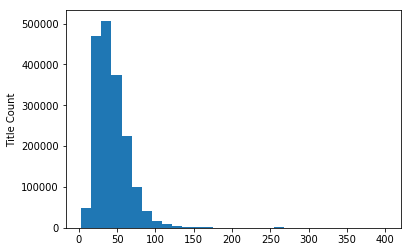

In [45]:
tmp = [len(v) for v in train_title_raw]
plt.hist(tmp, bins = 30)
plt.ylabel('Title Count')

In [46]:
train_title_vecs = []

for doc in train_title_raw:
    words = nltk.word_tokenize(doc)
    # print("Document length {0}".format(len(words)))
    
    doc = []
    for w in words:
        if w in word_to_index_title.keys():
            doc.append(word_to_index_title[w])
        else:
            doc.append(word_to_index_title['<unk>'])
            
    if len(doc) >= 10:
        doc = [3] + doc[0:10] + [2]
        # print("Greater than {0}".format(len(doc)))
    else:
        remaining = 10 - len(doc)
        doc = [3] + doc + [2] + [0] * remaining
        # print("Less than {0}".format(len(doc)))
    
    train_title_vecs.append(doc)

In [47]:
print(train_title_vecs[0])

[3, 4396, 4385, 3337, 4327, 3570, 1447, 3748, 2, 0, 0, 0]


In [48]:
' '.join([index_to_word_title[v] for v in train_title_vecs[0]])

'_start_ run tests against any specified k8s cluster _end_ pad pad pad'

In [49]:
train_title_raw[0]

'run tests against any specified k8s cluster'

In [50]:
len(train_title_vecs)

1800000

# Saving data

In [51]:
train_body_vecs = np.array(train_body_vecs)
train_title_vecs = np.array(train_title_vecs)

In [52]:
train_body_vecs.shape, train_title_vecs.shape

((1800000, 70), (1800000, 12))

In [53]:
# Save the processed data
np.save('train_title_vecs.npy', train_title_vecs)
np.save('train_body_vecs.npy', train_body_vecs)

In [10]:
def load_encoder_inputs(encoder_np_vecs='train_body_vecs.npy'):
    
    vectorized_body = np.load(encoder_np_vecs)
    # Encoder input is simply the body of the issue text
    encoder_input_data = vectorized_body
    doc_length = encoder_input_data.shape[1]
    
    print('Shape of encoder input: {}'.format(encoder_input_data.shape))
    
    return encoder_input_data, doc_length

In [11]:
def load_decoder_inputs(decoder_np_vecs='train_title_vecs.npy'):
    vectorized_title = np.load(decoder_np_vecs)
    # For Decoder Input, you don't need the last word as that is only for prediction
    # when we are training using Teacher Forcing.
    decoder_input_data = vectorized_title[:, :-1]

    # Decoder Target Data Is Ahead By 1 Time Step From Decoder Input Data (Teacher Forcing)
    decoder_target_data = vectorized_title[:, 1:]
    
    print('Shape of decoder input: {}'.format(decoder_input_data.shape))
    print('Shape of decoder target: {}'.format(decoder_target_data.shape))
    
    return decoder_input_data, decoder_target_data

In [13]:
encoder_input_data, doc_length = load_encoder_inputs('weights/train_body_vecs.npy')
decoder_input_data, decoder_target_data = load_decoder_inputs('weights/train_title_vecs.npy')

Shape of encoder input: (1800000, 70)
Shape of decoder input: (1800000, 11)
Shape of decoder target: (1800000, 11)


In [14]:
num_encoder_tokens = max(list(index_to_word.keys())) + 1
num_decoder_tokens = max(list(index_to_word_title.keys())) + 1

In [15]:
%matplotlib inline
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding, Bidirectional, BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [16]:
#arbitrarly set latent dimension for embedding and hidden units
latent_dim = 300

##### Define Model Architecture ######

########################
#### Encoder Model ####
encoder_inputs = Input(shape=(doc_length,), name='Encoder-Input')

# Word embeding for encoder (ex: Issue Body)
x = Embedding(num_encoder_tokens, latent_dim, name='Body-Word-Embedding', mask_zero=False)(encoder_inputs)
x = BatchNormalization(name='Encoder-Batchnorm-1')(x)

# Intermediate GRU layer (optional)
#x = GRU(latent_dim, name='Encoder-Intermediate-GRU', return_sequences=True)(x)
#x = BatchNormalization(name='Encoder-Batchnorm-2')(x)

# We do not need the `encoder_output` just the hidden state.
_, state_h = GRU(latent_dim, return_state=True, name='Encoder-Last-GRU')(x)

# Encapsulate the encoder as a separate entity so we can just 
#  encode without decoding if we want to.
encoder_model = Model(inputs=encoder_inputs, outputs=state_h, name='Encoder-Model')

seq2seq_encoder_out = encoder_model(encoder_inputs)

########################
#### Decoder Model ####
decoder_inputs = Input(shape=(None,), name='Decoder-Input')  # for teacher forcing

# Word Embedding For Decoder (ex: Issue Titles)
dec_emb = Embedding(num_decoder_tokens, latent_dim, name='Decoder-Word-Embedding', mask_zero=False)(decoder_inputs)
dec_bn = BatchNormalization(name='Decoder-Batchnorm-1')(dec_emb)

# Set up the decoder, using `decoder_state_input` as initial state.
decoder_gru = GRU(latent_dim, return_state=True, return_sequences=True, name='Decoder-GRU')
decoder_gru_output, _ = decoder_gru(dec_bn, initial_state=seq2seq_encoder_out)
x = BatchNormalization(name='Decoder-Batchnorm-2')(decoder_gru_output)

# Dense layer for prediction
decoder_dense = Dense(num_decoder_tokens, activation='softmax', name='Final-Output-Dense')
decoder_outputs = decoder_dense(x)

########################
#### Seq2Seq Model ####

#seq2seq_decoder_out = decoder_model([decoder_inputs, seq2seq_encoder_out])
seq2seq_Model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


seq2seq_Model.compile(optimizer=optimizers.Nadam(lr=0.001), loss='sparse_categorical_crossentropy')

In [17]:
seq2seq_Model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Decoder-Input (InputLayer)      (None, None)         0                                            
__________________________________________________________________________________________________
Decoder-Word-Embedding (Embeddi (None, None, 300)    1351200     Decoder-Input[0][0]              
__________________________________________________________________________________________________
Encoder-Input (InputLayer)      (None, 70)           0                                            
__________________________________________________________________________________________________
Decoder-Batchnorm-1 (BatchNorma (None, None, 300)    1200        Decoder-Word-Embedding[0][0]     
__________________________________________________________________________________________________
Encoder-Mo

In [18]:
from keras.callbacks import CSVLogger, ModelCheckpoint

script_name_base = 'tutorial_seq2seq'
csv_logger = CSVLogger('weights/{:}.log'.format(script_name_base))
model_checkpoint = ModelCheckpoint('weights/{:}.epoch{{epoch:02d}}-val{{val_loss:.5f}}.hdf5'.format(script_name_base),
                                   save_best_only=True)

batch_size = 1200
epochs = 7
history = seq2seq_Model.fit([encoder_input_data, decoder_input_data], np.expand_dims(decoder_target_data, -1),
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.12, callbacks=[csv_logger, model_checkpoint])

Train on 1584000 samples, validate on 216000 samples
Epoch 1/7
1584000/1584000 [==============================] - 639s 403us/step - loss: 2.6316 - val_loss: 2.3502


/home/hulk/.virtualenvs/py3/lib/python3.5/site-packages/keras/engine/topology.py:2368: UserWarning: Layer Decoder-GRU was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'Encoder-Model/Encoder-Last-GRU/while/Exit_2:0' shape=(?, 300) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


Epoch 2/7
1584000/1584000 [==============================] - 630s 398us/step - loss: 2.2714 - val_loss: 2.2780
Epoch 3/7
1584000/1584000 [==============================] - 631s 398us/step - loss: 2.1932 - val_loss: 2.2531
Epoch 4/7
1584000/1584000 [==============================] - 630s 398us/step - loss: 2.1461 - val_loss: 2.2404
Epoch 5/7
1584000/1584000 [==============================] - 630s 398us/step - loss: 2.1112 - val_loss: 2.2361
Epoch 6/7
1584000/1584000 [==============================] - 630s 398us/step - loss: 2.0848 - val_loss: 2.2362
Epoch 7/7
1584000/1584000 [==============================] - 630s 398us/step - loss: 2.0629 - val_loss: 2.2374


In [19]:
#save model
seq2seq_Model.save('weights/seq2seq_model_tutorial.h5')

/home/hulk/.virtualenvs/py3/lib/python3.5/site-packages/keras/engine/topology.py:2368: UserWarning: Layer Decoder-GRU was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'Encoder-Model/Encoder-Last-GRU/while/Exit_2:0' shape=(?, 300) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '
